# PyShop
## Session 2: Examples
### Creating NumPy Arrays

In [1]:
import numpy as np

x = np.array([1, 2, 3])
y = np.zeros((2, 2))
z = np.ones((2, 2))
a = np.eye((2))

print(x)
print(y)
print(z)
print(a)

[1 2 3]
[[ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.]
 [ 1.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


In [2]:
# Be aware of data type.  Numpy only allows one type.
np.array([1.0, 1])

array([ 1.,  1.])

In [3]:
import sys
# How big are these things?
n = 10
print(sys.getsizeof(int(1)), sys.getsizeof(np.array(1)), sys.getsizeof([1]))
print(sys.getsizeof(np.ones((n))),
      sys.getsizeof([1. for i in range(0, n)]))
print(sys.getsizeof(np.ones((n), dtype = np.float32)),
      sys.getsizeof([1. for i in range(0, n)]))
print(sys.getsizeof(np.ones((n), dtype = np.float32)/2),
      sys.getsizeof([1./2 for i in range(0, n)]))

14 44 40
128 100
88 100
88 100


In [ ]:
print(sys.getsizeof(np.ones((n), dtype = np.float32)/2),
      sys.getsizeof([1./2 for i in range(0, n)]))

#### Looks like Python 3 solved the problem I had of variable size list objects!!  Hooray!

In [5]:
# Dimensions are important!  Be careful how big the arrays get
dims = 5
D = 10.
print(sys.getsizeof(np.ones(([D for i in range(0, dims)]))))

800080


### Indexing NumPy Arrays

In [6]:
a = np.eye(2)
print(a)

[[ 1.  0.]
 [ 0.  1.]]


In [7]:
# Referencing a single entry
a[0, 0]

1.0

In [8]:
# Assignment
a[0, 0] = 2
print(a)

[[ 2.  0.]
 [ 0.  1.]]


In [9]:
# Also supports slicing
print(a[0, :])
print(a[1, :])

[ 2.  0.]
[ 0.  1.]


### Pointers and Copies

In [10]:
# Equality creates a view
a = np.eye(2)
b = a
print(a)
print(b)

[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


In [11]:
# Assigning then changes original.  View references this
a[0, 0] = 0
print(a)
print(b)

[[ 0.  0.]
 [ 0.  1.]]
[[ 0.  0.]
 [ 0.  1.]]


In [12]:
# If you need a copy, be explicit
a = np.eye(2)
b[:] = a
c = a.copy()
print(a)
print(b)
print(c)

[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


In [13]:
a[0, 0] = 0
print(a)
print(b)
print(c)

[[ 0.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


### Broadcasting and Array Operations

In [14]:
a = np.eye(2)
b = np.eye(2)
c = 2

#Multiplicaiton is done elementwise
print(a * b)

[[ 1.  0.]
 [ 0.  1.]]


In [15]:
#Scalar multiplcation is broadcast
print(a * c)

[[ 2.  0.]
 [ 0.  2.]]


In [16]:
# Scalar addition is broadcast in the same way
print(a + c)

[[ 3.  2.]
 [ 2.  3.]]


In [19]:
# Some arrays to broadcast
d = np.array([1, 2])
e = np.vstack((a, np.zeros(2)))
f = np.array([[1, 2], [3, 4]])

In [20]:
print(d,e,f)

[1 2] [[ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]] [[1 2]
 [3 4]]


In [21]:
# Required that all of the dimensions either match or equal one
print(e.shape)
print(e)
print(d.shape)
print(d)
print(d + e)
print(e + a)

(3, 2)
[[ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]]
(2,)
[1 2]
[[ 2.  2.]
 [ 1.  3.]
 [ 1.  2.]]


ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In [22]:
# Notice the duplication along the smallest axis
print(d)
print(e)
print(d + e)

[1 2]
[[ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]]
[[ 2.  2.]
 [ 1.  3.]
 [ 1.  2.]]


In [23]:
# A one d array is neither column nor row
# This means the broadcasting rule seems ambiguous
print(d.shape)
print(d == d.T)

(2,)
[ True  True]


In [25]:
d = np.array([1., 1.])
print(a + d)

[[ 2.  1.]
 [ 1.  2.]]


In [26]:
# Broadcasting rules move along the first matching axis FROM THE RIGHT
print(f.shape)
print(f)
print(d.shape)
print(d)
print(f + d)
print(f + d.T)

(2, 2)
[[1 2]
 [3 4]]
(2,)
[ 1.  1.]
[[ 2.  3.]
 [ 4.  5.]]
[[ 2.  3.]
 [ 4.  5.]]


In [27]:
# You can change this by adding a new axis
# This helps to be specific about shape
print(d[:, np.newaxis].shape)
print(f + d[:, np.newaxis])

(2, 1)
[[ 2.  3.]
 [ 4.  5.]]


### Why do I care?

In [36]:
import time

length = 10

a = [i for i in range(0, length)]
b = [i for i in range(0, length)]
c = []

t0 = time.time()

for i in range(len(a)):
  c.append(a[i]*b[i])

t1 = time.time()
print("Process executed in : %s : seconds." %(t1 - t0))

Process executed in : 0.0020112991333007812 : seconds.


In [37]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
a = np.arange(0, length).reshape(10,1)
b = np.arange(0, length)

t0 = time.time()

C = a * b

t1 = time.time()
print("Process executed in : %s : seconds." %(t1 - t0))

Process executed in : 0.0015246868133544922 : seconds.


In [44]:
a

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [42]:
a[:, np.newaxis].shape

(10, 1)

### Integration

Example:

$$
\int_{0}^{\infty} ke^{-kx}dx
$$

In [45]:
import scipy.integrate

def integrand(x, k):
    return k*np.exp(-k*x)

k = 1.0
scipy.integrate.quad(integrand, 0, np.inf, args = (k))

(1.0000000000000002, 5.842606742906004e-11)

In [46]:
# Note: it is unclear what quadrature rule is used here
scipy.integrate.quad(lambda x: k*np.exp(-k*x), 0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

### Unconstrained Optimization

Methods:

1. "Downhill simplex method".  Generates a simplex of dimension n+1 and then uses a simple algorithm (similar to a bisection algorithm) to find local optima.

2. "Broyden-Fletcher-Goldfarb-Shanno Algorithm".  Considered a "quasi-newton" method.  A newton step would calculate the hessian directly, where quasi-newton methods approximate it in some way.  

3. "Powell's Conjugate Direction Method". A sort of combination of steps in the taxi-cab method.  Instead of searching only along a single vecor, take a linear combination of the gradients.

4. "Conjugate Gradient Method".  Most useful for sparse, linear systems.  You'll notice here it is unsuccessful.

In [47]:
import scipy.optimize
import time

def rosenbrock(x, a, b):
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

a = 1.
b = 100.

x0 = np.array([2., 3.])

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='Nelder-Mead')
t1 = time.time()
print("\nProcess executed in : %s : seconds.\n" %(t1 - t0))
print(res)

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='BFGS')
t1 = time.time()
print("\nProcess executed in : %s : seconds.\n" %(t1 - t0))
print(res)

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='Powell')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(res)

t0 = time.time()
res = scipy.optimize.minimize(rosenbrock, x0, args=(a, b), method='CG')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(res)


Process executed in : 0.04545426368713379 : seconds.

       x: array([ 0.99998529,  0.99997065])
 message: 'Optimization terminated successfully.'
    nfev: 158
  status: 0
     nit: 84
     fun: 2.1717765323851955e-10
 success: True

Process executed in : 0.046898841857910156 : seconds.

        x: array([ 0.9999955,  0.999991 ])
     njev: 29
      jac: array([  1.47687684e-06,  -7.56666863e-07])
     nfev: 116
   status: 0
      fun: 2.022655100500386e-11
      nit: 21
  success: True
  message: 'Optimization terminated successfully.'
 hess_inv: array([[ 0.49587577,  0.99095821],
       [ 0.99095821,  1.98516622]])

Process executed in : 0.09585809707641602 : seconds. 

       x: array([ 1.,  1.])
    nfev: 564
  status: 0
     nit: 20
 success: True
 message: 'Optimization terminated successfully.'
     fun: 3.0798904676865048e-26
   direc: array([[ -4.93584446e-02,  -9.77519184e-02],
       [  1.40763803e-07,   3.48461380e-07]])

Process executed in : 0.01332998275756836 : secon

### Root Finding

Methods:

1. "Hybrid".  From MINPACK, essentially a modified Powell method.

2. "Broyden's Method".  A quasi-newton method for multidimensional root finding.  Calculate the jacobian only once, then do an update each iteration.

3. "Anderson Mixing".  A quasi-newton method.  Approximate the jacobian by the "best" solution in the space spanned by the last M vectors... whatever that means!

4. "Linear Mixing".  Similar to Anderson method.

5. "Krylov Methods".  Approximate the jacobian by a spanning basis of the krylov space.  Very neat.

In [48]:
def f(x, a, b):
    return np.array([a*(1 - x[0]), b*(x[1] - x[0]**2)**2])

a = 1.
b = 100.
x0 = np.array([10., 2.])

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='hybr')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='broyden1')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='anderson')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='linearmixing')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)

t0 = time.time()
sol = scipy.optimize.root(f, x0, args=(a, b), method='krylov')
t1 = time.time()
print("\nProcess executed in : %s : seconds. \n" %(t1 - t0))
print(sol)


Process executed in : 0.00789642333984375 : seconds. 

       x: array([ 1.,  1.])
     qtf: array([  4.43734258e-29,  -2.81227533e-33])
    nfev: 90
  status: 1
     fun: array([  0.00000000e+00,   1.10933565e-29])
 success: True
       r: array([  1.57784785e+04,  -2.68667616e-13,   1.00571850e-17])
 message: 'The solution converged.'
    fjac: array([[ -6.33774668e-05,   9.99999998e-01],
       [ -9.99999998e-01,  -6.33774668e-05]])

Process executed in : 1.042186975479126 : seconds. 

       x: array([  9.90012725,  98.01898469])
 message: 'The maximum number of iterations allowed has been reached.'
     fun: array([ -8.90012725e+00,   4.17982042e-03])
     nit: 300
  status: 2
 success: False

Process executed in : 1.451967477798462 : seconds. 

       x: array([  -289.79875445,  83985.3460786 ])
 message: 'The maximum number of iterations allowed has been reached.'
     fun: array([ 290.79875445,  411.27841135])
     nit: 300
  status: 2
 success: False

Process executed in : 0.

### Simple Plotting

/home/pi/env/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


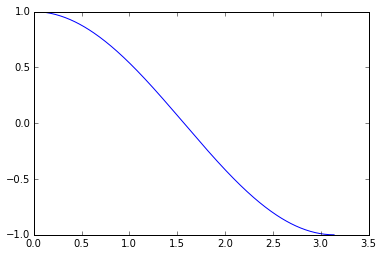

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, np.pi, 0.01)
y = np.cos(x)
plt.plot(x, y)
plt.show()

### Modifying Plot Attributes

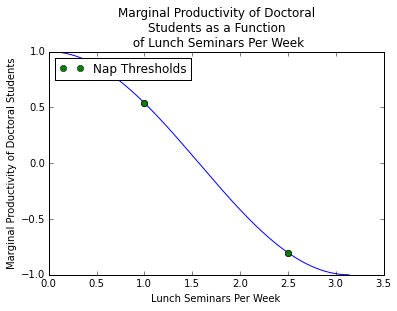

In [55]:
x = np.arange(0, np.pi, 0.01)
y = np.cos(x)
plt.plot(x, y)

#Add axis labels
plt.xlabel('Lunch Seminars Per Week')
plt.ylabel('Marginal Productivity of Doctoral Students')

#Add title
plt.title("Marginal Productivity of Doctoral\n"
          + "Students as a Function\n"
          + " of Lunch Seminars Per Week")

#Add emphasis to important points
points = np.array([1.0, 2.5])
plt.plot(points, np.cos(points), 'ro')

#Add a label and legend to the points
plt.plot(points, np.cos(points), 'o', label='Nap Thresholds')
#plt.legend()

#But the legend is poorly placed, so move it to a better spot
plt.legend(loc=2)

plt.show()

### Subplot Objects

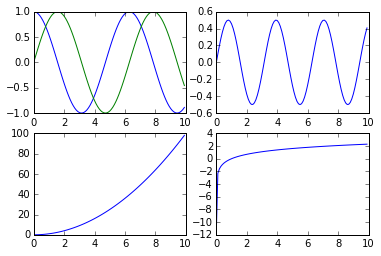

In [56]:
x = np.arange(0, 10, 0.1)
f = lambda x: np.cos(x)
g = lambda x: np.sin(x)
h = lambda x: x**2
i = lambda x: np.log(x + 0.00001)

#Create the figure and axes objects. sharex and sharey allow them to share axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

#Plot on the first axes object. Notice, you can plot several times on the same object
ax1.plot(x, f(x))
ax1.plot(x, g(x))

#Plot on the second axes object
ax2.plot(x, f(x)*g(x))

#Plot on the second axes object
ax3.plot(x, h(x))

#Plot on the second axes object
ax4.plot(x, i(x))

plt.show()

### 3D Plotting

In [ ]:
%matplotlib qt

In [ ]:
%matplotlib inline

/home/pi/env/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/pi/env/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


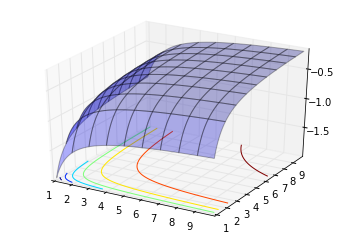

In [57]:
from mpl_toolkits.mplot3d import Axes3D

def U(c1, c2, beta, gamma):
    return c1**(1 - gamma)/(1 - gamma) + beta*c2**(1 - gamma)/(1 - gamma)

beta = 0.98
gamma = 2.0

fig = plt.figure()
ax = fig.gca(projection="3d")

low = 1.0
high = 10.0

c1, c2 = np.arange(low, high, 0.1), np.arange(low, high, 0.1)
#c2 = np.arange(low, high, 0.1)

C1, C2 = np.meshgrid(c1, c2)

utils = U(C1, C2, beta, gamma)

ax.plot_surface(C1, C2, utils, alpha=0.3)
cset = ax.contour(C1, C2, utils, zdir='z', offset=-2.0)
#cset = ax.contour(C1, C2, utils, zdir='y', offset=10.0)
#cset = ax.contour(C1, C2, utils, zdir='x', offset=1.0)

plt.show()

### DataFrames

In [60]:
import pandas as pd

DF = pd.read_csv('http://people.stern.nyu.edu/wgreene/Econometrics/gasoline.csv')

In [61]:
print(DF.head())
DF.head()

   YEAR  GASEXP    GASQ    GASP  GASCPIU  PCINCOME   PNC   PUC   PPT    PD  \
0  1953     7.4  25.415  16.668     21.2      8802  47.2  26.7  16.8  37.7   
1  1954     7.8  26.223  17.029     21.8      8757  46.5  22.7  18.0  36.8   
2  1955     8.6  28.505  17.210     22.1      9177  44.8  21.5  18.5  36.1   
3  1956     9.4  30.229  17.729     22.8      9450  46.1  20.7  19.2  36.1   
4  1957    10.2  31.393  18.497     23.8      9508  48.5  23.2  19.9  37.2   

     PN    PS     POP         G        PG         Y  
0  29.7  19.4  159565  2.768058  2.813491  9.082734  
1  29.7  20.0  162391  2.781800  2.834918  9.077609  
2  29.5  20.4  165275  2.847639  2.845491  9.124456  
3  29.9  20.9  168221  2.888693  2.875202  9.153770  
4  30.9  21.8  171274  2.908491  2.917609  9.159889  


,YEAR,GASEXP,GASQ,GASP,GASCPIU,PCINCOME,PNC,PUC,PPT,PD,PN,PS,POP,G,PG,Y
0,1953,7.4,25.415,16.668,21.2,8802,47.2,26.7,16.8,37.7,29.7,19.4,159565,2.768058,2.813491,9.082734
1,1954,7.8,26.223,17.029,21.8,8757,46.5,22.7,18.0,36.8,29.7,20.0,162391,2.781800,2.834918,9.077609
2,1955,8.6,28.505,17.210,22.1,9177,44.8,21.5,18.5,36.1,29.5,20.4,165275,2.847639,2.845491,9.124456
3,1956,9.4,30.229,17.729,22.8,9450,46.1,20.7,19.2,36.1,29.9,20.9,168221,2.888693,2.875202,9.153770
4,1957,10.2,31.393,18.497,23.8,9508,48.5,23.2,19.9,37.2,30.9,21.8,171274,2.908491,2.917609,9.159889


In [62]:
DF.shape

(52, 16)

In [65]:
DF.describe()

,YEAR,GASEXP,GASQ,GASP,GASCPIU,PCINCOME,PNC,PUC,PPT,PD,PN,PS,POP,G,PG,Y
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1978.500000,70.101923,65.446212,51.342962,65.882692,16851.461538,87.567308,77.800000,89.390385,78.269231,83.598077,89.776923,225373.750000,3.309784,3.729303,9.674873
std,15.154757,57.514661,23.327505,30.827411,39.708668,5566.950633,37.087415,51.068186,69.190151,36.782725,48.664649,66.911322,38077.423097,0.238492,0.678991,0.348767
min,1953.000000,7.400000,25.415000,16.668000,21.200000,8757.000000,44.800000,20.700000,16.800000,36.100000,29.500000,19.400000,159565.000000,2.768058,2.813491,9.077609
25%,1965.750000,15.700000,44.880250,19.925250,25.475000,11947.250000,51.450000,29.875000,25.875000,38.975000,34.775000,27.350000,196036.000000,3.130542,2.991939,9.388109
50%,1978.500000,58.150000,66.904500,47.501500,61.000000,16817.500000,78.800000,58.000000,53.200000,72.000000,72.900000,64.150000,223867.500000,3.394976,3.850084,9.730152
75%,1991.250000,111.500000,81.909500,77.204500,99.250000,21334.000000,126.075000,121.100000,149.525000,115.100000,130.925000,147.725000,254378.000000,3.484597,4.346457,9.968048
max,2004.000000,224.500000,103.587000,123.901000,159.700000,27208.000000,141.700000,158.700000,210.600000,129.400000,172.200000,222.800000,293951.000000,3.581457,4.819483,10.211266


In [66]:
DF.columns

Index(['YEAR', 'GASEXP', 'GASQ', 'GASP', 'GASCPIU', 'PCINCOME', 'PNC', 'PUC',
       'PPT', 'PD', 'PN', 'PS', 'POP', 'G', 'PG', 'Y'],
      dtype='object')

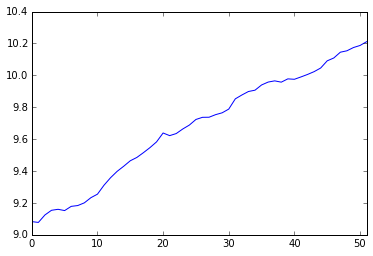

In [70]:
DF.Y.plot()

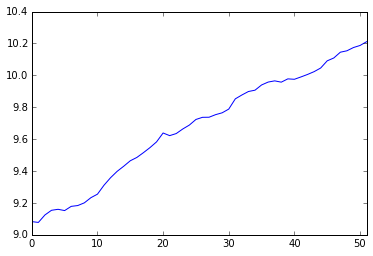

In [67]:
DF['Y'].plot()

In [71]:
DF.columns = map(str.lower, DF.columns)
print(DF.columns)

Index(['year', 'gasexp', 'gasq', 'gasp', 'gascpiu', 'pcincome', 'pnc', 'puc',
       'ppt', 'pd', 'pn', 'ps', 'pop', 'g', 'pg', 'y'],
      dtype='object')


In [72]:
DF2 = DF.set_index('year')
DF2.head()

,gasexp,gasq,gasp,gascpiu,pcincome,pnc,puc,ppt,pd,pn,ps,pop,g,pg,y
year,,,,,,,,,,,,,,,
1953,7.4,25.415,16.668,21.2,8802,47.2,26.7,16.8,37.7,29.7,19.4,159565,2.768058,2.813491,9.082734
1954,7.8,26.223,17.029,21.8,8757,46.5,22.7,18.0,36.8,29.7,20.0,162391,2.781800,2.834918,9.077609
1955,8.6,28.505,17.210,22.1,9177,44.8,21.5,18.5,36.1,29.5,20.4,165275,2.847639,2.845491,9.124456
1956,9.4,30.229,17.729,22.8,9450,46.1,20.7,19.2,36.1,29.9,20.9,168221,2.888693,2.875202,9.153770
1957,10.2,31.393,18.497,23.8,9508,48.5,23.2,19.9,37.2,30.9,21.8,171274,2.908491,2.917609,9.159889


In [73]:
print(DF2.loc[1953])

gasexp           7.400000
gasq            25.415000
gasp            16.668000
gascpiu         21.200000
pcincome      8802.000000
pnc             47.200000
puc             26.700000
ppt             16.800000
pd              37.700000
pn              29.700000
ps              19.400000
pop         159565.000000
g                2.768058
pg               2.813491
y                9.082734
Name: 1953, dtype: float64
